# Task 1. Data Quality Check
Do you have all the relevant fields in the raw data file given to you? : Yes
Convert the given json data to a csv file : done
Create a data quality report (the format of this report must be decided by the learner) to check:
a. The data type of each variable
b. If a variable is numeric in nature, then, the numeric summary (Min, Max, Mean,25th percentile, Median, 75th percentile, 90th percentile, 95th percentile, number of zeros and number of unique values, number of missing values, percentage of missing values) must be computed.
c. If a variable is string variable, then find out the number of unique values, number of missing values, percentage of missing values.
After the data quality report is created you need to :
a. Check if there is any variable whose data-type needs to be changed
b. Identify the type of data cleaning needed for different columns in the data
c. Handle missing data appropriately d. In case there are extreme values present in a variable do the appropriate treatment.

In [103]:
import numpy as np
import pandas as pd
df= pd.read_json(r'C:\Retention Analysis\retention.json')
df.to_csv(r'C:\Retention Analysis\retentioncsv.csv',index=None)
df4= df.T
df4

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376
...,...,...,...,...,...,...,...,...,...,...
54025,M,24 years,$ 47237.01,College_Graduated,0,I,1,1,0,1147
54026,F,46 years,$ 106930.05,Individuals,1,A,1,8,0,6061
54027,M,24 years,$ 185323.05,College_Graduated,0,I,0,0,0,1817
54028,F,27 years,$ 65246.79,College_Graduated,0,I,0,1,0,1447


In [104]:
df4.head()



,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


In [105]:
df5.dtypes

gender                   category
age                        object
gross_income               object
segment                  category
num_credit_cards            int32
tiprel_1mes                object
ind_actividad_cliente       int32
num_Products                int32
num_loans                   int32
duration                    int32
dtype: object

In [106]:
df4.describe()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,54030,54030,54030,54030,54030,54030,54030,54030,54030,54030
unique,2,110,49994,3,2,2,2,14,2,5677
top,F,23 years,$ 451931.22,Individuals,0,I,0,1,0,716
freq,29681,3080,29,32607,51335,29026,28686,27817,53524,226


In [107]:
df4.dtypes


gender                   object
age                      object
gross_income             object
segment                  object
num_credit_cards         object
tiprel_1mes              object
ind_actividad_cliente    object
num_Products             object
num_loans                object
duration                 object
dtype: object

In [108]:
# Minimum
print("---------Finding minimum---------")
df4.min()
#df


---------Finding minimum---------


gender                                   F
age                               10 years
gross_income                   $ 100004.31
segment                  College_Graduated
num_credit_cards                         0
tiprel_1mes                              A
ind_actividad_cliente                    0
num_Products                             0
num_loans                                0
duration                               366
dtype: object

In [109]:
# Maximum
print("---------Finding Maximum---------")
df4.max()
# for gender column we cannot see max

---------Finding Maximum---------


gender                           M
age                       99 years
gross_income             $ 99994.2
segment                        VIP
num_credit_cards                 1
tiprel_1mes                      I
ind_actividad_cliente            1
num_Products                    13
num_loans                        1
duration                      7909
dtype: object

In [110]:
# Mean
print("---------Finding Mean---------")
df4.mean()

---------Finding Mean---------


num_credit_cards            0.049880
ind_actividad_cliente       0.469073
num_Products                1.536017
num_loans                   0.009365
duration                 2913.936665
dtype: float64

In [111]:
# Mode
print("---------Finding Mode---------")
df4.mode()

---------Finding Mode---------


,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,F,23 years,$ 451931.22,Individuals,0,I,0,1,0,716


In [112]:
# Median
print("---------Finding Median---------")
df4.median()

---------Finding Median---------


num_credit_cards            0.0
ind_actividad_cliente       0.0
num_Products                1.0
num_loans                   0.0
duration                 2039.5
dtype: float64

In [113]:
# Changing the DataType
df4['num_credit_cards']=df4['num_credit_cards'].astype(str).astype(int)
df4['num_Products']=df4['num_Products'].astype(str).astype(int)
df4['num_loans']=df4['num_loans'].astype(str).astype(int)
df4['duration']=df4['duration'].astype(str).astype(int)
df4['age']=df4['age'].astype(str)
# 25th percentile , 50th(median) percentile ,75th percentile ,90th percentile , 95th percentile 

df4.quantile([0.25,0.50,0.75,0.90,0.95])

,num_credit_cards,num_Products,num_loans,duration
0.25,0.0,1.0,0.0,1118.0
0.50,0.0,1.0,0.0,2039.5
0.75,0.0,2.0,0.0,4693.0
0.90,0.0,3.0,0.0,5844.0
0.95,0.0,5.0,0.0,6529.0


In [114]:

# number of unique values
df5.nunique()

gender                       2
age                        110
gross_income             49994
segment                      3
num_credit_cards             2
tiprel_1mes                  2
ind_actividad_cliente        2
num_Products                14
num_loans                    2
duration                  5677
dtype: int64

In [115]:
# number of missing values
df5.isnull().sum().sum()

0

In [116]:
# percentage of missing values
(df5.isnull().sum().sum()/len(df5))*100

0.0

In [117]:
#

df5['num_credit_cards']=df5['num_credit_cards'].astype(int)
df5['num_Products']=df5['num_Products'].astype(int)
df5['num_loans']=df5['num_loans'].astype(int)
df5['duration']=df5['duration'].astype(int)
df5['ind_actividad_cliente']=df5['ind_actividad_cliente'].astype(int)


In [118]:
'''changing the gender and segment as category'''
df5=df5.astype({'segment':'category','gender':'category'})


In [119]:
df5.dtypes

gender                   category
age                        object
gross_income               object
segment                  category
num_credit_cards            int32
tiprel_1mes                object
ind_actividad_cliente       int32
num_Products                int32
num_loans                   int32
duration                    int32
dtype: object

In [120]:
'''If a variable is string variable, then find out the number of unique values,
number of missing values, percentage of missing values.'''

col1=['gender','segment','num_credit_cards','tiprel_1mes','ind_actividad_cliente','num_Products','num_loans']
for col in col1:
    print("Column %s has : " %col,df5[col].unique(), "  as unique values")
    print("Column %s has : " %col,df5[col].isna().sum(), "  # missing  value")
    print("Column %s has : " %col,(df5[col].isna().sum() / len(df5))*100, "  % missing value")
    print ("                                                                                ")

Column gender has :  ['M', 'F']
Categories (2, object): ['M', 'F']   as unique values
Column gender has :  0   # missing  value
Column gender has :  0.0   % missing value
                                                                                
Column segment has :  ['Individuals', 'College_Graduated', 'VIP']
Categories (3, object): ['Individuals', 'College_Graduated', 'VIP']   as unique values
Column segment has :  0   # missing  value
Column segment has :  0.0   % missing value
                                                                                
Column num_credit_cards has :  [0 1]   as unique values
Column num_credit_cards has :  0   # missing  value
Column num_credit_cards has :  0.0   % missing value
                                                                                
Column tiprel_1mes has :  ['I' 'A']   as unique values
Column tiprel_1mes has :  0   # missing  value
Column tiprel_1mes has :  0.0   % missing value
                                   

In [121]:
'''Identify the type of data cleaning needed for different columns in the data'''
df4
#df4["AGE"]=df4["age"]

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376
...,...,...,...,...,...,...,...,...,...,...
54025,M,24 years,$ 47237.01,College_Graduated,0,I,1,1,0,1147
54026,F,46 years,$ 106930.05,Individuals,1,A,1,8,0,6061
54027,M,24 years,$ 185323.05,College_Graduated,0,I,0,0,0,1817
54028,F,27 years,$ 65246.79,College_Graduated,0,I,0,1,0,1447


In [122]:
df4["age"]=df4["age"].str.split(" ").str[0]


In [218]:
#df4=df4.drop('AGE',axis=1)
df4.head()

,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
0,1,21,79071.00,0,0,0,1,0,1035,0,1,0
1,1,23,178271.00,0,0,0,1,0,1097,1,0,0
2,1,24,40141.15,0,0,1,1,0,1866,1,0,0
3,1,24,130741.00,0,0,0,1,0,1440,1,0,0
4,1,31,112975.00,0,0,0,0,0,376,0,1,0


In [124]:
''''''
df4["gross_income"]=df4["gross_income"].str.split(" ").str[1]

In [125]:
df4.columns


Index(['gender', 'age', 'gross_income', 'segment', 'num_credit_cards',
       'tiprel_1mes', 'ind_actividad_cliente', 'num_Products', 'num_loans',
       'duration'],
      dtype='object')

In [126]:
df4['gross_income']=df4['gross_income'].astype(str).astype(float)
df4['gross_income']=df4['gross_income'].round(decimals=0)
df4.head()


,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79071.0,Individuals,0,I,0,1,0,1035
1,M,23,178271.0,College_Graduated,0,I,0,1,0,1097
2,M,24,31244.0,College_Graduated,0,I,1,1,0,1866
3,M,24,130741.0,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.0,Individuals,0,I,0,0,0,376


In [127]:
df4.segment.value_counts()

Individuals          32607
College_Graduated    18963
VIP                   2460
Name: segment, dtype: int64

In [128]:
df4['segment'].unique()

array(['Individuals', 'College_Graduated', 'VIP'], dtype=object)

In [129]:
df4.columns

Index(['gender', 'age', 'gross_income', 'segment', 'num_credit_cards',
       'tiprel_1mes', 'ind_actividad_cliente', 'num_Products', 'num_loans',
       'duration'],
      dtype='object')

In [130]:
df4['gender']=df4['gender'].str.replace('M','1',regex=True)
#df["gender"].str.replace("F",0,regex=True)

In [131]:
df4['gender']=df4['gender'].str.replace('F','0',regex=True)
#df["gender"].str.replace("F",0,regex=True)

In [132]:
df4.gender.value_counts()

0    29681
1    24349
Name: gender, dtype: int64

In [133]:
df4.head(5)

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,1,21,79071.0,Individuals,0,I,0,1,0,1035
1,1,23,178271.0,College_Graduated,0,I,0,1,0,1097
2,1,24,31244.0,College_Graduated,0,I,1,1,0,1866
3,1,24,130741.0,College_Graduated,0,I,0,1,0,1440
4,1,31,112975.0,Individuals,0,I,0,0,0,376


In [134]:
dummy=pd.get_dummies(df4['segment'])

In [135]:
df4=pd.concat((df4,dummy),axis=1)

In [136]:
df4=df4.drop('segment',axis=1)

In [137]:
df4.head()

,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
0,1,21,79071.0,0,I,0,1,0,1035,0,1,0
1,1,23,178271.0,0,I,0,1,0,1097,1,0,0
2,1,24,31244.0,0,I,1,1,0,1866,1,0,0
3,1,24,130741.0,0,I,0,1,0,1440,1,0,0
4,1,31,112975.0,0,I,0,0,0,376,0,1,0


In [219]:
''' tiprel_1mes Replacing I and A to 0 and 1 '''
df4['tiprel_1mes']=df4['tiprel_1mes'].replace('I','0',regex=True)
df4['tiprel_1mes']=df4['tiprel_1mes'].replace('A','1',regex=True)
df4.head()

,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
0,1,21,79071.00,0,0,0,1,0,1035,0,1,0
1,1,23,178271.00,0,0,0,1,0,1097,1,0,0
2,1,24,40141.15,0,0,1,1,0,1866,1,0,0
3,1,24,130741.00,0,0,0,1,0,1440,1,0,0
4,1,31,112975.00,0,0,0,0,0,376,0,1,0


In [139]:
'''In case there are extreme values
present in a variable do the appropriate'''

import matplotlib.pyplot as plt
import seaborn as born
# if any NA values are present drop that row or column
df4=df4.dropna()

In [140]:
df4['gross_income']

0         79071.0
1        178271.0
2         31244.0
3        130741.0
4        112975.0
           ...   
54025     47237.0
54026    106930.0
54027    185323.0
54028     65247.0
54029    180678.0
Name: gross_income, Length: 54030, dtype: float64

C:\Users\siddharth.boiri\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


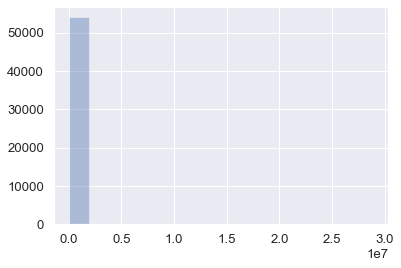

In [141]:
# mean mode median at same point (normal , no skew)
born.distplot(x=df4['gross_income'],bins=15, kde=False)
plt.show()


In [142]:
'''There are many outliers and the data is right-skewed. Log transformation will transform data to normal 
or close to normal. Let’s apply the log transformation to reduce the variability of data.'''

import numpy as np
df_gross_income = np.log(df4['gross_income'])


In [143]:
df4['gross_income'].head()


0     79071.0
1    178271.0
2     31244.0
3    130741.0
4    112975.0
Name: gross_income, dtype: float64

<AxesSubplot:xlabel='gross_income'>

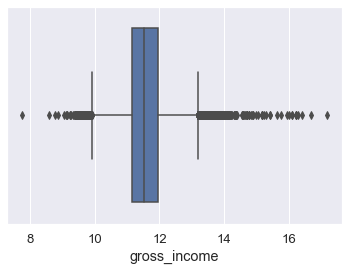

In [144]:
born.boxplot(x = df_gross_income)

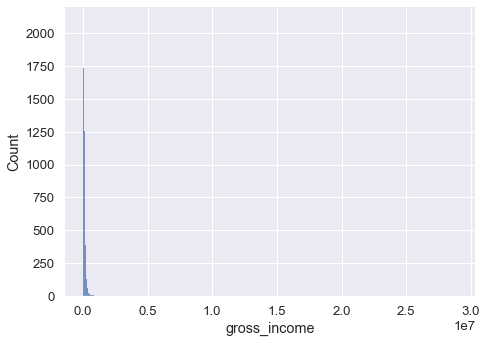

In [145]:
'''1st method The first example is to create a basic histogram.
It divides the value range of continuous variables into discrete bins and shows how many values exist in each bin.'''


born.set(style="darkgrid", font_scale=1.2)

born.displot(
  data=df4,
  x="gross_income",
  kind="hist",
  aspect=1.4
)

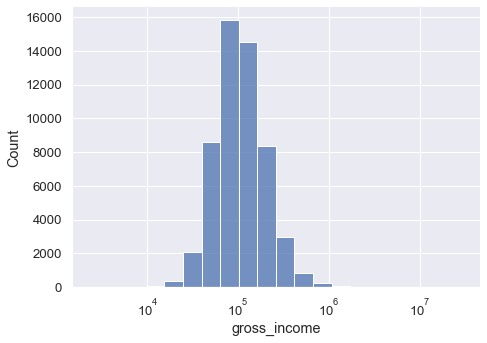

In [146]:
#use log_scale
sns.displot(
  data=df4,
  x="gross_income",
  kind="hist",
  aspect=1.4,
  log_scale=10,
  bins=20
)

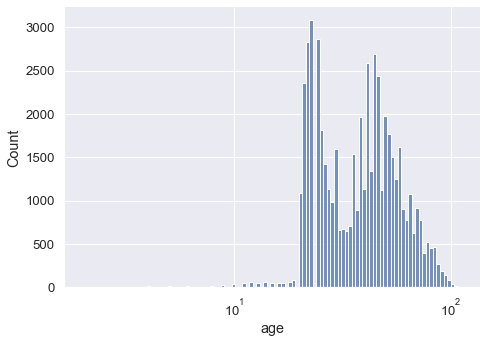

In [156]:
#Age
df4['age']=df4['age'].astype(int)
born.displot(
  data=df4,
  x="age",
  kind="hist",
  aspect=1.4,
  log_scale=10
)


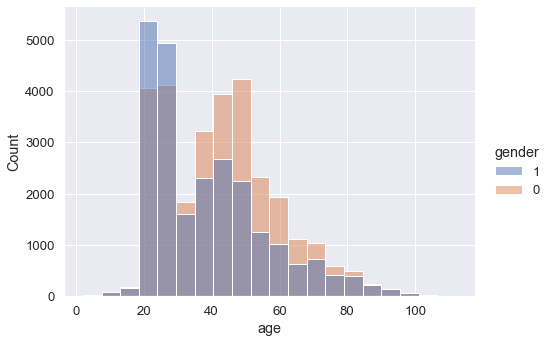

In [158]:
born.displot(
  data=df4,
  x="age",
  hue= "gender",
  kind="hist",
  aspect=1.4,
  bins=20
)

In [159]:
df4.quantile([0.0,0.05,0.24,0.50,0.75,0.90,0.95,0.99,1])

,age,gross_income,num_credit_cards,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
0.00,2.0,2336.00,0.0,0.0,0.0,366.00,0.0,0.0,0.0
0.05,21.0,40141.15,0.0,0.0,0.0,607.45,0.0,0.0,0.0
0.24,25.0,67329.00,0.0,1.0,0.0,1091.00,0.0,0.0,0.0
0.50,40.0,101566.50,0.0,1.0,0.0,2039.50,0.0,1.0,0.0
0.75,51.0,156253.50,0.0,2.0,0.0,4693.00,1.0,1.0,0.0
0.90,65.0,234388.10,0.0,3.0,0.0,5844.00,1.0,1.0,0.0
0.95,74.0,310033.45,0.0,5.0,0.0,6529.00,1.0,1.0,0.0
0.99,89.0,554898.12,1.0,8.0,0.0,7432.71,1.0,1.0,1.0
1.00,112.0,28894396.00,1.0,13.0,1.0,7909.00,1.0,1.0,1.0


In [161]:
#Removing extreme values from  age
q05 = df4['age'].quantile(0.05) # 5th quantile
q95 = df4['age'].quantile(0.99) # 95th quantile

df4['age'].clip(q05, q95, inplace=True)

In [162]:
#Removing extreme values from gross_income
q05 = df4['gross_income'].quantile(0.05) # 5th quantile
q95 = df4['gross_income'].quantile(0.99) # 95th quantile

df4['gross_income'].clip(q05, q95, inplace=True)


In [163]:
df4.quantile([0.0,0.05,0.24,0.50,0.75,0.90,0.95,0.99,1])

,age,gross_income,num_credit_cards,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
0.00,21.0,40141.1500,0.0,0.0,0.0,366.00,0.0,0.0,0.0
0.05,21.0,40142.8825,0.0,0.0,0.0,607.45,0.0,0.0,0.0
0.24,25.0,67329.0000,0.0,1.0,0.0,1091.00,0.0,0.0,0.0
0.50,40.0,101566.5000,0.0,1.0,0.0,2039.50,0.0,1.0,0.0
0.75,51.0,156253.5000,0.0,2.0,0.0,4693.00,1.0,1.0,0.0
0.90,65.0,234388.1000,0.0,3.0,0.0,5844.00,1.0,1.0,0.0
0.95,74.0,310033.4500,0.0,5.0,0.0,6529.00,1.0,1.0,0.0
0.99,89.0,554718.5752,1.0,8.0,0.0,7432.71,1.0,1.0,1.0
1.00,89.0,554898.1200,1.0,13.0,1.0,7909.00,1.0,1.0,1.0


# TASK 2
Task 2. Data Exploration and business hypothesis testing

1.For people who were inactive at the start of the study and were active by the time the study ended, is there a pattern in terms of age and gender?
2.Do people with more than average annual income tend to have relatively high activity rates compared to people with less than average annual income?
3.What is the relationship between the number of products owned by customers who were active at the start and at the end vs those who were active at the start but were inactive at the end of the study period?
How people who display consistent behaviour (active at start and active at end, inactive at start and inactive at end) differ from people who display a change in their behaviour (active at start but inactive at the end or inactive at start but active at end)?
4.Generate elaborate profiles for the following four groups: a. Active at the start but inactive at the end b. Active at the start and active by the end c. Inactive at the start but active at the end d. Inactive at the start and inactive at the end

In [225]:
'''1. For people who were inactive at the start of the study and were active by the time
the study ended, is there a pattern in terms of age and gender?'''

df4['tiprel_1mes']=df4['tiprel_1mes'].astype(str)
df4['ind_actividad_cliente']=df4['ind_actividad_cliente'].astype(str)
#df4=df4[(df4['tiprel_1mes']=='0')(df4['ind_actividad_cliente']=='1')]
#df2


In [226]:
ca=df4[(df4['tiprel_1mes']=='0')&(df4['ind_actividad_cliente']=='1')]
ca.head()



,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
2,1,24,40141.15,0,0,1,1,0,1866,1,0,0
9,1,26,40141.15,0,0,1,1,0,1458,1,0,0
97,0,84,71984.00,0,0,1,1,0,2874,0,1,0
119,1,49,314065.00,0,0,1,2,0,6418,0,1,0
165,1,25,50304.00,0,0,1,1,0,1133,1,0,0


C:\Users\siddharth.boiri\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\siddharth.boiri\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='gender', ylabel='age'>

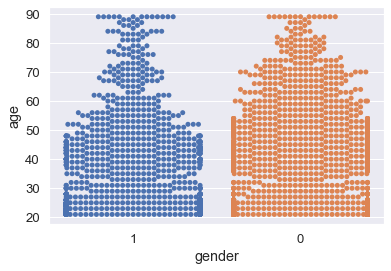

In [227]:
sns.swarmplot(x=ca['gender'],
              y=ca['age'])

In [187]:
#ph=['tiprel_1mes','ind_actividad_cliente']
#sns.barplot(x=ca[ph],y=ca['gender'])
ca['gender']=ca['gender'].astype(object)
ca['age']=ca['age'].astype(int)


<ipython-input-187-cd020d35cae5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca['gender']=ca['gender'].astype(object)
<ipython-input-187-cd020d35cae5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca['age']=ca['age'].astype(int)


<AxesSubplot:xlabel='gender', ylabel='age'>

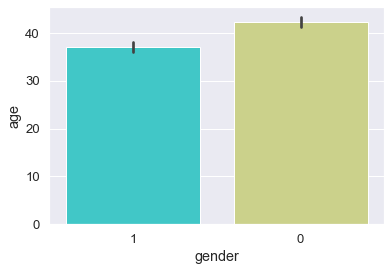

In [228]:
#sns.barplot(x=ca['age'],y=ca['gender'])
sns.barplot(x='gender',y='age',data=ca, palette='rainbow')

In [229]:
ca.columns

Index(['gender', 'age', 'gross_income', 'num_credit_cards', 'tiprel_1mes',
       'ind_actividad_cliente', 'num_Products', 'num_loans', 'duration',
       'College_Graduated', 'Individuals', 'VIP'],
      dtype='object')

In [230]:
df5=df.T
df5

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376
...,...,...,...,...,...,...,...,...,...,...
54025,M,24 years,$ 47237.01,College_Graduated,0,I,1,1,0,1147
54026,F,46 years,$ 106930.05,Individuals,1,A,1,8,0,6061
54027,M,24 years,$ 185323.05,College_Graduated,0,I,0,0,0,1817
54028,F,27 years,$ 65246.79,College_Graduated,0,I,0,1,0,1447


In [231]:
# second part 
'''2. Do people with more than average annual income tend to have relatively 
high activity rates compared to people with less than average annual income?'''

df4['ind_actividad_cliente']=df5['ind_actividad_cliente']
df4.head()


,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
0,1,21,79071.00,0,0,0,1,0,1035,0,1,0
1,1,23,178271.00,0,0,0,1,0,1097,1,0,0
2,1,24,40141.15,0,0,1,1,0,1866,1,0,0
3,1,24,130741.00,0,0,0,1,0,1440,1,0,0
4,1,31,112975.00,0,0,0,0,0,376,0,1,0


In [232]:
avg_income = df4['gross_income'].mean()
print("Average income = :", avg_income)

Average income = : 128275.56702238866


In [233]:
#Finding the gross income values greater than average.
Greater_values = pd.DataFrame()
Greater_values = df4[df4['gross_income'] >  df4['gross_income'].mean()]
Greater_values.head()

,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
1,1,23,178271.0,0,0,0,1,0,1097,1,0,0
3,1,24,130741.0,0,0,0,1,0,1440,1,0,0
6,0,43,131282.0,0,1,0,1,0,5022,0,1,0
7,1,48,184642.0,0,1,1,1,0,4066,0,1,0
8,0,36,164348.0,0,1,1,1,0,1427,0,0,1


In [234]:
#Sum of all 1 (active at the end)
A = Greater_values.ind_actividad_cliente.sum()
print(A)

9971


In [235]:
#Rate of all the 1's present in gross income by total number of gross income.
Rate = A / Greater_values.shape[0]
print(Rate*100)

52.12504574206702


In [236]:
#Finding the gross income values less than average.
less_values = pd.DataFrame()
less_values = df4[df4['gross_income'] <  df4['gross_income'].mean()]
less_values.head()

,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
0,1,21,79071.00,0,0,0,1,0,1035,0,1,0
2,1,24,40141.15,0,0,1,1,0,1866,1,0,0
4,1,31,112975.00,0,0,0,0,0,376,0,1,0
5,0,32,40141.15,0,1,1,4,0,699,0,1,0
9,1,26,40141.15,0,0,1,1,0,1458,1,0,0


In [237]:
df4['tiprel_1mes']=df4['tiprel_1mes'].astype(str)
df4['ind_actividad_cliente']=df4['ind_actividad_cliente'].astype(str)

In [238]:
#Sum of all 1 (active at the end)
AA = less_values.ind_actividad_cliente.sum()
print(AA)

15373


In [239]:
#Rate of all the 1's present in gross income by total number of gross income.
Rate2 = AA / less_values.shape[0]
print(Rate2*100)

44.04744849717773


In [240]:
sa=df4[(df4['tiprel_1mes']=='1') | (df4['ind_actividad_cliente']=='1')]
sa

,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
2,1,24,40141.15,0,0,1,1,0,1866,1,0,0
5,0,32,40141.15,0,1,1,4,0,699,0,1,0
6,0,43,131282.00,0,1,0,1,0,5022,0,1,0
7,1,48,184642.00,0,1,1,1,0,4066,0,1,0
8,0,36,164348.00,0,1,1,1,0,1427,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
54021,1,24,68386.00,0,1,1,1,0,1838,1,0,0
54022,0,65,266600.00,1,1,1,2,0,3722,0,1,0
54025,1,24,47237.00,0,0,1,1,0,1147,1,0,0
54026,0,46,106930.00,1,1,1,8,0,6061,0,1,0


In [241]:
#na=df4[(df4['tiprel_1mes']=='0') & (df4['ind_actividad_cliente']=='0')]
#na

In [242]:
#fa=na['duration'].mean()
#fa

In [243]:
#gg=na['duration'].median()
#gg

In [244]:
df4['tiprel_1mes']=df4['tiprel_1mes'].astype(str)
df4['ind_actividad_cliente']=df4['ind_actividad_cliente'].astype(str)

In [245]:
# part d
df4.dtypes

gender                    object
age                        int64
gross_income             float64
num_credit_cards           int32
tiprel_1mes               object
ind_actividad_cliente     object
num_Products               int32
num_loans                  int32
duration                   int32
College_Graduated          uint8
Individuals                uint8
VIP                        uint8
dtype: object

In [246]:
''' Ques 3:- What is the relationship between the number of products owned by customers who
were active at the start and at the end vs those who were active at the start but were
inactive at the end of the study period?'''

# a5 is the customer who were inactive at the startbut active at the end
a5=df4[(df4['tiprel_1mes']=='1') & (df4['ind_actividad_cliente']=='0')]

a5['num_Products'].sum() # sum of number of products of above customers



1635

In [247]:
b5=df4[(df4['tiprel_1mes']=='1') & (df4['ind_actividad_cliente']=='1')]
#--- already executed below
b5['num_Products'].sum()

59112

In [248]:
# so for the Q3 
'''we came to a conclusion that Number of ‘Products’ were more when customers 
were active at the start till end as compared to customer who were active at the start but were inactive at the end'''

'we came to a conclusion that Number of ‘Products’ were more when customers \nwere active at the start till end as compared to customer who were active at the start but were inactive at the end'

In [250]:
# Consistent Behaviour
''' How people who display consistent behaviour (active at start and active at end, inactive at start and 
inactive at end) differ from people who display a change in their behaviour
(active at start but inactive at the end or inactive at start but active at end)?'''
# Case 1 : (Active at start and Active at end) OR (Inactive at start and Inactive at end)
case1=df4[((df4['tiprel_1mes']=='1') & (df4['ind_actividad_cliente']=='1'))|((df4['tiprel_1mes']=='0') & (df4['ind_actividad_cliente']=='0'))]
case1.head()


,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
0,1,21,79071.00,0,0,0,1,0,1035,0,1,0
1,1,23,178271.00,0,0,0,1,0,1097,1,0,0
3,1,24,130741.00,0,0,0,1,0,1440,1,0,0
4,1,31,112975.00,0,0,0,0,0,376,0,1,0
5,0,32,40141.15,0,1,1,4,0,699,0,1,0


In [209]:
case1.describe()

,age,gross_income,num_credit_cards,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
count,49494.000000,49494.000000,49494.000000,49494.000000,49494.000000,49494.000000,49494.000000,49494.000000,49494.000000
mean,40.719138,128507.408322,0.054087,1.580838,0.009718,2905.256960,0.352770,0.598194,0.049036
std,16.788820,91409.444055,0.226192,1.630273,0.098102,2017.987063,0.477837,0.490268,0.215946
min,21.000000,40141.150000,0.000000,0.000000,0.000000,366.000000,0.000000,0.000000,0.000000
25%,25.000000,68712.250000,0.000000,1.000000,0.000000,1131.000000,0.000000,0.000000,0.000000
50%,39.000000,101729.500000,0.000000,1.000000,0.000000,2025.000000,0.000000,1.000000,0.000000
75%,51.000000,156719.750000,0.000000,2.000000,0.000000,4654.000000,1.000000,1.000000,0.000000
max,89.000000,554898.120000,1.000000,13.000000,1.000000,7909.000000,1.000000,1.000000,1.000000


In [251]:
# Case 2 : (Active at start and Inactive at end) OR (Inactive at start and active at end)
case2=df4[((df4['tiprel_1mes']=='1') & (df4['ind_actividad_cliente']=='0'))|((df4['tiprel_1mes']=='0') & (df4['ind_actividad_cliente']=='1'))]
case2.head()

,gender,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
2,1,24,40141.15,0,0,1,1,0,1866,1,0,0
6,0,43,131282.00,0,1,0,1,0,5022,0,1,0
9,1,26,40141.15,0,0,1,1,0,1458,1,0,0
97,0,84,71984.00,0,0,1,1,0,2874,0,1,0
116,0,43,165731.00,0,1,0,3,0,5585,0,1,0


In [212]:
case2.describe()

,age,gross_income,num_credit_cards,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
count,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000
mean,42.060626,125745.859508,0.003968,1.046958,0.005511,3008.644180,0.331349,0.661376,0.007275
std,17.995506,88046.626696,0.062876,0.656575,0.074043,2131.646434,0.470750,0.473294,0.084993
min,21.000000,40141.150000,0.000000,0.000000,0.000000,366.000000,0.000000,0.000000,0.000000
25%,25.000000,67465.750000,0.000000,1.000000,0.000000,1073.000000,0.000000,0.000000,0.000000
50%,41.000000,99893.000000,0.000000,1.000000,0.000000,2310.500000,0.000000,1.000000,0.000000
75%,53.000000,152412.000000,0.000000,1.000000,0.000000,5039.000000,1.000000,1.000000,0.000000
max,89.000000,554898.120000,1.000000,4.000000,1.000000,7879.000000,1.000000,1.000000,1.000000


In [ ]:
'''5. Generate elaborate profiles for the following four groups:
a. Active at the start but inactive at the end
b. Active at the start and active by the end
c. Inactive at the start but active at the end
d. Inactive at the start and inactive at the end'''

In [214]:
# Active and InActive
a5=df4[(df4['tiprel_1mes']=='1') & (df4['ind_actividad_cliente']=='0')]
a5.describe()


,age,gross_income,num_credit_cards,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000
mean,44.711630,129546.857660,0.006673,0.779314,0.011916,3427.450429,0.259771,0.725453,0.014776
std,18.365449,90991.091515,0.081435,0.687383,0.108534,2327.815923,0.438614,0.446392,0.120684
min,21.000000,40141.150000,0.000000,0.000000,0.000000,366.000000,0.000000,0.000000,0.000000
25%,27.000000,68242.250000,0.000000,0.000000,0.000000,1010.250000,0.000000,0.000000,0.000000
50%,44.000000,103546.000000,0.000000,1.000000,0.000000,3723.000000,0.000000,1.000000,0.000000
75%,56.000000,155857.000000,0.000000,1.000000,0.000000,5462.500000,1.000000,1.000000,0.000000
max,89.000000,554898.120000,1.000000,4.000000,1.000000,7794.000000,1.000000,1.000000,1.000000


In [215]:
#Active and Active
b5=df4[(df4['tiprel_1mes']=='1') & (df4['ind_actividad_cliente']=='1')]
b5.describe()

,age,gross_income,num_credit_cards,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
count,22906.000000,22906.00000,22906.000000,22906.000000,22906.000000,22906.00000,22906.000000,22906.000000,22906.000000
mean,43.823714,135663.51625,0.116782,2.580634,0.020999,3304.76910,0.205492,0.688597,0.105911
std,15.669354,91996.09258,0.321167,1.879328,0.143383,2128.15378,0.404070,0.463077,0.307731
min,21.000000,40141.15000,0.000000,0.000000,0.000000,366.00000,0.000000,0.000000,0.000000
25%,32.000000,74152.75000,0.000000,1.000000,0.000000,1203.00000,0.000000,0.000000,0.000000
50%,43.000000,110414.00000,0.000000,2.000000,0.000000,3202.00000,0.000000,1.000000,0.000000
75%,52.000000,167160.50000,0.000000,3.000000,0.000000,5266.00000,0.000000,1.000000,0.000000
max,89.000000,554898.12000,1.000000,13.000000,1.000000,7909.00000,1.000000,1.000000,1.000000


In [216]:
#InActive and Active
c5=df4[(df4['tiprel_1mes']=='0') & (df4['ind_actividad_cliente']=='1')]
c5.describe()

,age,gross_income,num_credit_cards,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.0,2438.000000,2438.000000,2438.000000,2438.000000
mean,39.779327,122474.943134,0.001641,1.277276,0.0,2648.244053,0.392945,0.606235,0.000820
std,17.353375,85314.868006,0.040480,0.530003,0.0,1874.054211,0.488505,0.488684,0.028636
min,21.000000,40141.150000,0.000000,0.000000,0.0,366.000000,0.000000,0.000000,0.000000
25%,24.000000,67119.750000,0.000000,1.000000,0.0,1091.000000,0.000000,0.000000,0.000000
50%,37.000000,97502.000000,0.000000,1.000000,0.0,1824.500000,0.000000,1.000000,0.000000
75%,50.000000,148200.500000,0.000000,2.000000,0.0,4283.000000,1.000000,1.000000,0.000000
max,89.000000,554898.120000,1.000000,4.000000,0.0,7879.000000,1.000000,1.000000,1.000000


In [217]:
#Inactive and active
d5=df4[(df4['tiprel_1mes']=='0') & (df4['ind_actividad_cliente']=='0')]
d5.describe()

,age,gross_income,num_credit_cards,num_Products,num_loans,duration,College_Graduated,Individuals,VIP
count,26588.000000,26588.000000,26588.000000,26588.000000,26588.0,26588.000000,26588.000000,26588.000000,26588.000000
mean,38.044494,122342.303455,0.000075,0.719498,0.0,2561.070671,0.479652,0.520310,0.000038
std,17.254589,90449.859190,0.008673,0.549297,0.0,1850.117522,0.499595,0.499597,0.006133
min,21.000000,40141.150000,0.000000,0.000000,0.0,366.000000,0.000000,0.000000,0.000000
25%,24.000000,64591.000000,0.000000,0.000000,0.0,1084.000000,0.000000,0.000000,0.000000
50%,32.000000,94769.000000,0.000000,1.000000,0.0,1774.000000,0.000000,1.000000,0.000000
75%,48.000000,146964.250000,0.000000,1.000000,0.0,3903.000000,1.000000,1.000000,0.000000
max,89.000000,554898.120000,1.000000,4.000000,0.0,7879.000000,1.000000,1.000000,1.000000
